In [2]:
# Fundamental classes
import numpy as np 
import pandas as pd 
import tensorflow as tf
import os

# Image related
import cv2
from PIL import Image

#Performance Plot
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For the model and it's training
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, AveragePooling2D
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
from skimage.io import imread, imshow
from torchvision.transforms import v2
from PIL import Image
from pathlib import Path
import random
# Time
import time
import datetime
import tensorflow as tf


# Загружаем данные

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

print("Path to dataset files:", path)

C:\Users\fedbe\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\fedbe\.cache\kagglehub\datasets\meowmeowmeowmeowmeow\gtsrb-german-traffic-sign\versions\1


In [3]:
data = []
labels = []
classes = 43

# Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join('C:/Users/fedbe/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1','Train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((32,32))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

# EDA

(array([ 210., 2220., 2250., 1410., 1980., 1860.,  420., 1440., 1410.,
        1470., 2010., 1320., 2100., 2160.,  780.,  630.,  420., 1110.,
        1200.,  210.,  360.,  330.,  390.,  510.,  270., 1500.,  600.,
         240.,  540.,  270.,  450.,  780.,  240.,  689.,  420., 1200.,
         390.,  210., 2070.,  300.,  360.,  240.,  240.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43.]),
 <BarContainer object of 43 artists>)

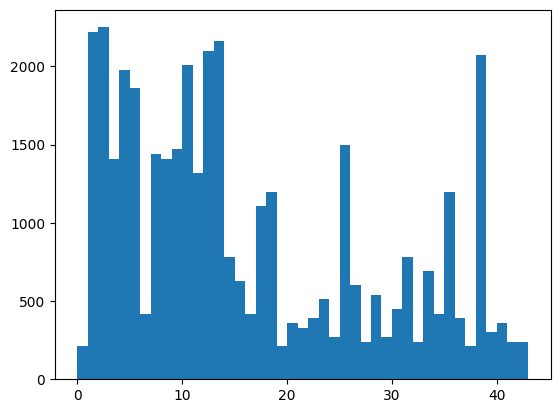

In [4]:
plt.hist(labels,np.arange(0,44))

In [5]:
size_aft_aug = 2500
classes_num = 43

In [6]:
data_train, data_test, lab_train, lab_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [7]:
data_aug = np.zeros([size_aft_aug*classes_num, 32, 32, 3])
labels_aug = np.zeros([size_aft_aug*classes_num])

In [8]:
#data_aug[0:data.shape[0]] = data

In [9]:
data_aug.shape

(107500, 32, 32, 3)

In [10]:
def augmentation(data, out_num, transforms):
    res_data = np.zeros([out_num, data.shape[1], data.shape[2], data.shape[3]])
    #res_labels = np.zeros([out_num])
    res_data[0:data.shape[0]] = data
    #res_labels[0:labels.shape[0]] = labels

    for i in range(data.shape[0], out_num):
        ind = np.random.randint(0,data.shape[0],size = 1)[0]
        #label = labels[ind]
        orig_img = data[ind]
        orig_img = torch.from_numpy(orig_img)#.float()
        orig_img = torch.permute(orig_img, (2, 0, 1))
        res_data[i] = torch.permute(transforms(orig_img), (1, 2, 0)).numpy()
        #labels[i] = label
    return res_data

In [11]:
def augmentation(data, out_num, transforms):
    res_data = np.zeros([out_num, data.shape[1], data.shape[2], data.shape[3]])
    #res_labels = np.zeros([out_num])
    res_data[0:data.shape[0]] = data
    #res_labels[0:labels.shape[0]] = labels

    for i in range(data.shape[0], out_num):
        ind = np.random.randint(0,data.shape[0],size = 1)[0]
        #label = labels[ind]
        orig_img = data[ind]
        orig_img = torch.from_numpy(orig_img)#.float()
        orig_img = torch.permute(orig_img, (2, 0, 1))
        res_data[i] = torch.permute(transforms(orig_img), (1, 2, 0)).numpy()
        #labels[i] = label
    return res_data

In [120]:
transforms_all = v2.Compose([
    v2.RandomAffine(degrees = [-10,10]),
    v2.ColorJitter(brightness = [0.9, 1.3], contrast = [0.7, 1.3], saturation = [0.9, 1.3]),
])

In [13]:
for i in range(classes_num):
    print('i = ',i)
    idxs = np.where(lab_train == i)[0]
    new_data = augmentation(data_train[idxs], size_aft_aug, transforms_all)
    data_aug[i*size_aft_aug:(i+1)*size_aft_aug] = new_data
    labels_aug[i*size_aft_aug:(i+1)*size_aft_aug] = i

i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
i =  10
i =  11
i =  12
i =  13
i =  14
i =  15
i =  16
i =  17
i =  18
i =  19
i =  20
i =  21
i =  22
i =  23
i =  24
i =  25
i =  26
i =  27
i =  28
i =  29
i =  30
i =  31
i =  32
i =  33
i =  34
i =  35
i =  36
i =  37
i =  38
i =  39
i =  40
i =  41
i =  42


In [174]:
data_aug.shape

(107500, 32, 32, 3)

In [175]:
data.shape

(39209, 32, 32, 3)

# С размытием

In [100]:
transforms_all2 = v2.Compose([
    v2.RandomAffine(degrees = [-10,10]),
    v2.ColorJitter(brightness = [0.9, 1.3], contrast = [0.7, 1.3], saturation = [0.9, 1.3]),
    v2.GaussianBlur(kernel_size = 3, sigma = 0.6)
])

In [101]:
data_aug2 = np.zeros([size_aft_aug*classes_num, 32, 32, 3])
labels_aug2 = np.zeros([size_aft_aug*classes_num])

In [102]:
for i in range(classes_num):
    print('i = ',i)
    idxs = np.where(lab_train == i)[0]
    new_data = augmentation(data_train[idxs], size_aft_aug, transforms_all)
    data_aug2[i*size_aft_aug:(i+1)*size_aft_aug] = new_data
    labels_aug2[i*size_aft_aug:(i+1)*size_aft_aug] = i

i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
i =  10
i =  11
i =  12
i =  13
i =  14
i =  15
i =  16
i =  17
i =  18
i =  19
i =  20
i =  21
i =  22
i =  23
i =  24
i =  25
i =  26
i =  27
i =  28
i =  29
i =  30
i =  31
i =  32
i =  33
i =  34
i =  35
i =  36
i =  37
i =  38
i =  39
i =  40
i =  41
i =  42


(array([2500., 2500., 2500., 2500., 2500., 2500., 2500., 2500., 2500.,
        2500., 2500., 2500., 2500., 2500., 2500., 2500., 2500., 2500.,
        2500., 2500., 2500., 2500., 2500., 2500., 2500., 2500., 2500.,
        2500., 2500., 2500., 2500., 2500., 2500., 2500., 2500., 2500.,
        2500., 2500., 2500., 2500., 2500., 2500., 2500.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43.]),
 <BarContainer object of 43 artists>)

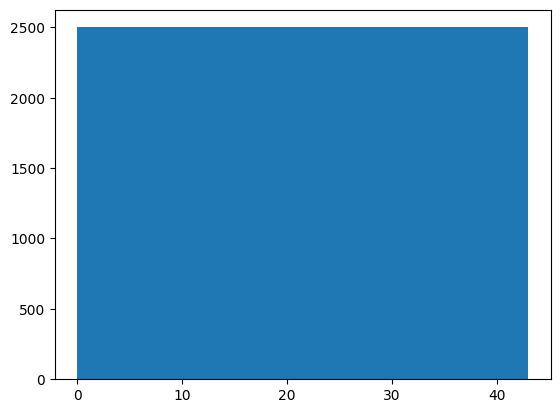

In [14]:
plt.hist(labels_aug,np.arange(0,44))

## Рассматриваем разные виды аугментации на одной картинке

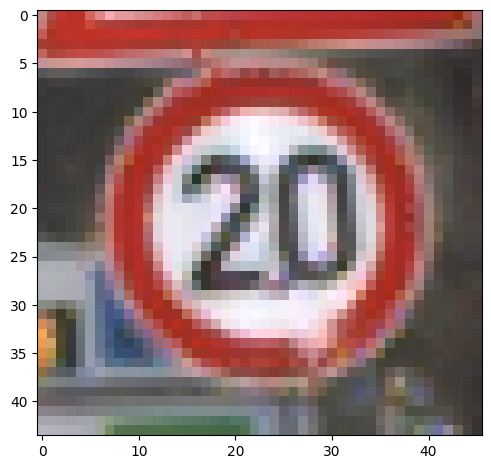

In [45]:
test_image = cv2.imread('./test_image.png')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
imshow(test_image)
orig_img = torch.from_numpy(test_image)#.float()
orig_img.size()
orig_img = torch.permute(orig_img, (2, 0, 1))

In [121]:
import torch
from torchvision.transforms import v2

H, W = 32, 32
img = orig_img

transforms = v2.Compose([
    #v2.RandomResizedCrop(size=(224, 224), antialias=True),
    #v2.RandomRotation(9),
    v2.RandomAffine(10),
    #v2.GaussianBlur(kernel_size = 3),
    #v2.GaussianNoise(),
    #v2.ToDtype(torch.float32, scale=True),
    #v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


In [ ]:
img2 = transforms(img)


In [ ]:

img3 = torch.permute(img2, (1,2,0))
imshow(img3.numpy())

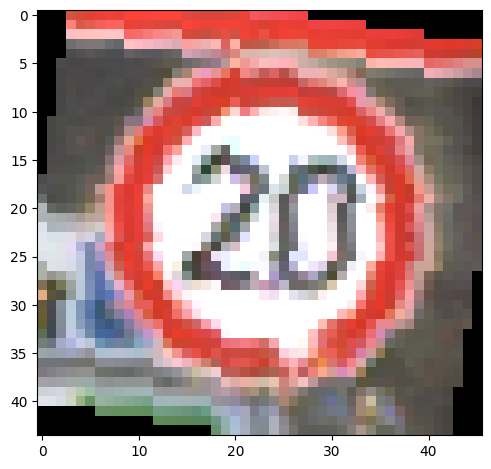

In [21]:
img4 = v2.functional.adjust_brightness(img2,1.3)
img4 = torch.permute(img4, (1,2,0))
imshow(img4.numpy())

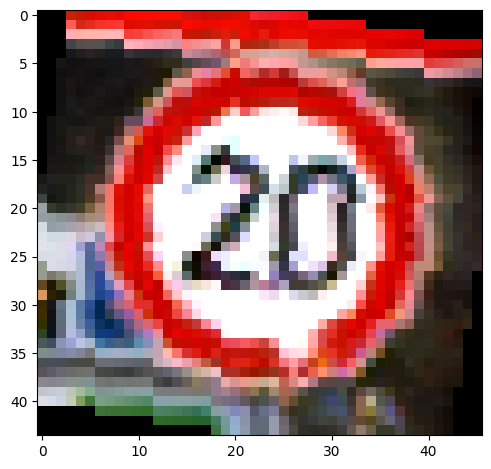

In [22]:
img4 = v2.functional.adjust_contrast(img2,1.7)
img4 = torch.permute(img4, (1,2,0))
imshow(img4.numpy())

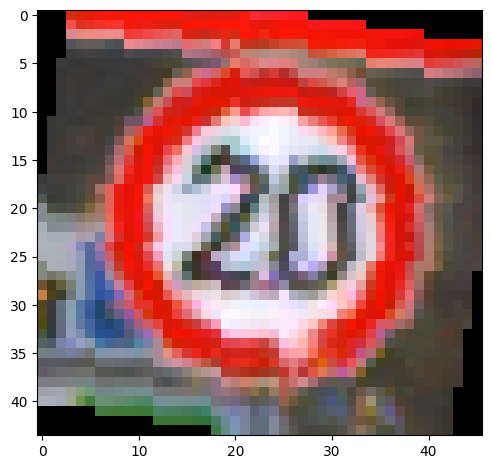

In [23]:
img4 = v2.functional.adjust_saturation(img2,1.7)
img4 = torch.permute(img4, (1,2,0))
imshow(img4.numpy())

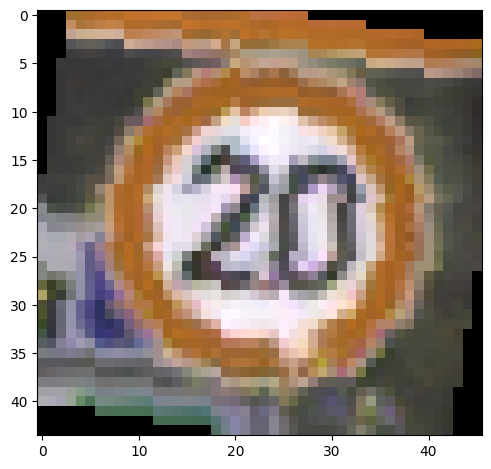

In [24]:
img4 = v2.functional.adjust_hue(img2,0.07)
img4 = torch.permute(img4, (1,2,0))
imshow(img4.numpy())

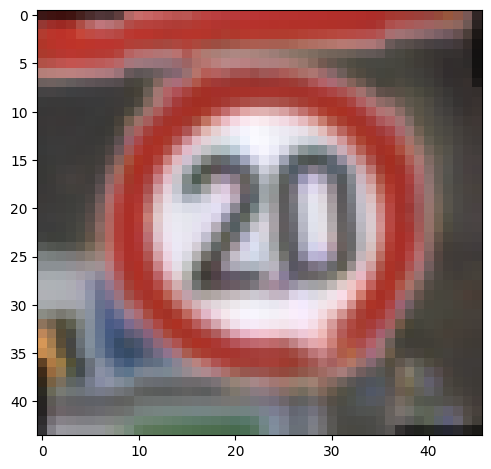

In [99]:
tr = v2.GaussianBlur(kernel_size = 3, sigma = 0.6)
img5 = tr(img2)
img5 = torch.permute(img5, (1,2,0))
imshow(img5.numpy())

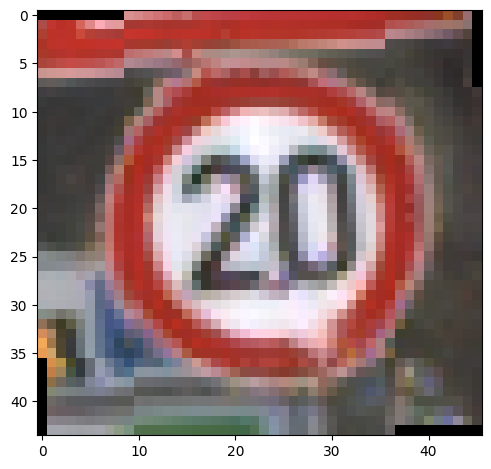

In [74]:
imshow(torch.permute(img2, (1,2,0)).numpy())

# Далее рассмотрим несколько моделей

In [25]:
def vis_history(acc_train_all, loss_train_all, acc_test_all, loss_test_all):
    fig = plt.figure(figsize=(16, 4))

    plt.subplot(1, 2, 1)

    plt.plot(loss_train_all, label='loss')
    plt.plot(loss_test_all, label='val_loss')

    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(acc_train_all, label='acc')
    plt.plot(acc_test_all, label='val_acc')

    plt.legend()
    plt.show()

In [26]:
def init_weights(m):
    if type(m) == torch.nn.Linear:
        torch.nn.init.kaiming_normal_(m.weight)
        m.bias.data.fill_(0.01)

In [3]:


class Model_LeNet5_0(torch.nn.Module):
    def __init__(self, num_classes=43, inp_shape = 32, hidden_size = 84):
        super(Model_LeNet5_0, self).__init__()
        n_ch = 3
        n_filt_1 = 6
        n_filt_2 = 16

        kernel_size_1 = 5
        kernel_size_2 = 5

        self.conv1 = nn.Conv2d(n_ch, n_filt_1, kernel_size=kernel_size_1, stride=1, padding=0)
        n_ch = n_filt_1
        im_len = inp_shape - kernel_size_1 + 1
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2) 
        im_len = im_len / 2
        self.conv2 = nn.Conv2d(n_ch, n_filt_2, kernel_size=kernel_size_2, stride=1, padding=0) 
        n_ch = n_filt_2
        im_len = im_len - kernel_size_2 + 1


        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2) 
        im_len = im_len / 2

        if im_len != int(im_len):
            print('shape error:', im_len)
            return
        print(im_len)
        self.inp_fc_size = int(im_len * im_len) * n_filt_2
        self.fc1 = nn.Linear(self.inp_fc_size, hidden_size)  
        self.fc3 = nn.Linear(hidden_size, num_classes)


    def forward(self, x):

        x = self.conv1(x)

        x = torch.relu(x)  
        x = self.pool1(x)

        x = self.conv2(x)

        x = torch.relu(x)  
        x = self.pool2(x)  

        x = x.view(-1, self.inp_fc_size)  
        x = self.fc1(x)
        x = torch.relu(x)  
        x = self.fc3(x) 

        return x
    def batch_train(self,optimizer, x, y):
        y_pred = self(x)

        loss = loss_fn(y_pred, y)
        self.zero_grad()
        loss.backward()
        optimizer.step()
        return (loss.item())
        
    def fit(self,n_epochs, learning_rate, train_loader, test_loader):
        acc_train_all = []
        loss_train_all = []
        acc_test_all = []
        loss_test_all = []
        optimizerAdam = torch.optim.Adam(self.parameters(), lr=0.001)
        scheduler = torch.optim.lr_scheduler.CyclicLR(optimizerAdam, base_lr=0.001, max_lr=0.01)


        for epoch in range(n_epochs):
            self.train()

            #permutation = torch.randperm(X.size()[0])
            acc_train = 0
            loss_train = 0
            acc_test = 0
            loss_test = 0
            for images, labels in train_loader:
                #print(images.size())

                self.batch_train(optimizerAdam, images, labels)
                scheduler.step()

            self.eval()
            for images, labels in train_loader:
                y_train_pred = self(images)
                acc_train += accuracy_score(labels, y_train_pred.argmax(dim=1))
                loss_train += loss_fn(y_train_pred, labels).detach()
                
            for images, labels in test_loader:
                y_test_pred = self(images)
                acc_test += accuracy_score(labels, y_test_pred.argmax(dim=1))
                loss_test += loss_fn(y_test_pred, labels).detach()

            acc_train_all = np.append(acc_train_all, acc_train / len(train_loader))
            loss_train_all = np.append(loss_train_all, loss_train / len(train_loader))
            acc_test_all = np.append(acc_test_all, acc_test / len(test_loader))
            loss_test_all = np.append(loss_test_all, loss_test / len(test_loader))
            

            print(f'Epoch {epoch}: \n Accuracy - train: {acc_train / len(train_loader)} | test: {acc_test / len(test_loader)} \n Loss - train: {loss_train / len(train_loader)} | test: {loss_test / len(test_loader)}')

        return(acc_train_all, loss_train_all, acc_test_all, loss_test_all)
        

In [4]:


class Model_Big(torch.nn.Module):
    def __init__(self, num_classes=43, inp_shape = 32, hidden_1_size = 1000,hidden_2_size = 512):
        super(Model_Big, self).__init__()
        n_ch = 3
        n_filt_1 = 32
        n_filt_2 = 64
        n_filt_3 =128
        n_filt_4 = 256
        kernel_size_1 = 5
        kernel_size_2 = 5
        kernel_size_3 = 3
        kernel_size_4 = 3
        self.conv1 = nn.Conv2d(n_ch, n_filt_1, kernel_size=kernel_size_1, stride=1, padding=0)
        n_ch = n_filt_1
        im_len = inp_shape - kernel_size_1 + 1
        
        self.conv2 = nn.Conv2d(n_ch, n_filt_2, kernel_size=kernel_size_2, stride=1, padding=0) 
        n_ch = n_filt_2
        im_len = im_len - kernel_size_2 + 1

        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2) 
        im_len = im_len / 2
        
        self.dropout1 = nn.Dropout(p=0.1)
        
        #self.conv5 = nn.Conv2d(n_ch, n_filt_5, kernel_size=kernel_size_5, stride=1, padding=0) 
        #n_ch = n_filt_5
        #im_len = im_len - kernel_size_5 + 1

        self.conv3 = nn.Conv2d(n_ch, n_filt_3, kernel_size=kernel_size_3, stride=1, padding=0)
        n_ch = n_filt_3
        im_len = im_len - kernel_size_3 + 1
        
        self.conv4 = nn.Conv2d(n_ch, n_filt_4, kernel_size=kernel_size_4, stride=1, padding=0) 
        n_ch = n_filt_4
        im_len = im_len - kernel_size_4 + 1

        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2) 
        im_len = im_len / 2
        
        self.dropout2 = nn.Dropout(p=0.2)   

        
        if im_len != int(im_len):
            print('shape error:', im_len)
            return
        self.inp_fc_size = int(im_len * im_len) * n_filt_4
        self.fc1 = nn.Linear(self.inp_fc_size, hidden_1_size) 
        self.fc2 = nn.Linear(hidden_1_size, hidden_2_size) 

        self.fc3 = nn.Linear(hidden_2_size, num_classes)


    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)  
        x = self.conv2(x)
        x = torch.relu(x)  
        x = self.pool1(x)
        x = self.dropout1(x)

        x = self.conv3(x)
        x = torch.relu(x)    
        x = self.conv4(x)
        x = torch.relu(x) 
        x = self.pool2(x)  
        x = self.dropout2(x)


        x = x.view(-1, self.inp_fc_size)  
        x = self.fc1(x)
        x = torch.relu(x)  
        
        x = self.fc2(x)
        x = torch.relu(x)
        
        x = self.fc3(x) 

        return x
    def batch_train(self, optimizer, x, y):
        y_pred = self(x)
       # print(f'y_pred: {y_pred}')
        #print(f'y: {y}')

        loss = loss_fn(y_pred, y)
        self.zero_grad()
        loss.backward()
        optimizer.step()
        return (loss.item())
        
    def fit(self, n_epochs, learning_rate, train_loader, test_loader):
        acc_train_all = []
        loss_train_all = []
        acc_test_all = []
        loss_test_all = []
        optimizerAdam = torch.optim.Adam(self.parameters(), lr=0.001)



        for epoch in range(n_epochs):
            self.train()

            acc_train = 0
            loss_train = 0
            acc_test = 0
            loss_test = 0
            
            for images, labels in train_loader:
                self.batch_train(optimizerAdam, images, labels)
                
            self.eval()
            for images, labels in train_loader:
                y_train_pred = self(images)
                acc_train += accuracy_score(labels, y_train_pred.argmax(dim=1))
                loss_train += loss_fn(y_train_pred, labels).detach()
                
            for images, labels in test_loader:
                y_test_pred = self(images)
                acc_test += accuracy_score(labels, y_test_pred.argmax(dim=1))
                loss_test += loss_fn(y_test_pred, labels).detach()

            acc_train_all = np.append(acc_train_all, acc_train / len(train_loader))
            loss_train_all = np.append(loss_train_all, loss_train / len(train_loader))
            acc_test_all = np.append(acc_test_all, acc_test / len(test_loader))
            loss_test_all = np.append(loss_test_all, loss_test / len(test_loader))

            print(f'Epoch {epoch}: \n Accuracy - train: {acc_train / len(train_loader)} | test: {acc_test / len(test_loader)} \n Loss - train: {loss_train / len(train_loader)} | test: {loss_test / len(test_loader)}')

        return(acc_train_all, loss_train_all, acc_test_all, loss_test_all)
        

In [18]:
data.shape

(39209, 32, 32, 3)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data_aug, labels_aug, test_size=0.2, random_state=42)

In [103]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(data_aug2, labels_aug2, test_size=0.2, random_state=42)

(array([1975., 2016., 1991., 1988., 2002., 1986., 1992., 2005., 2005.,
        1998., 2022., 1979., 2023., 2009., 1993., 1974., 1997., 1980.,
        1969., 2005., 2005., 1977., 2004., 2047., 1995., 1976., 1989.,
        2032., 1990., 2036., 1989., 2018., 1965., 1987., 2007., 2029.,
        2026., 2017., 1982., 2000., 1971., 2030., 2019.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43.]),
 <BarContainer object of 43 artists>)

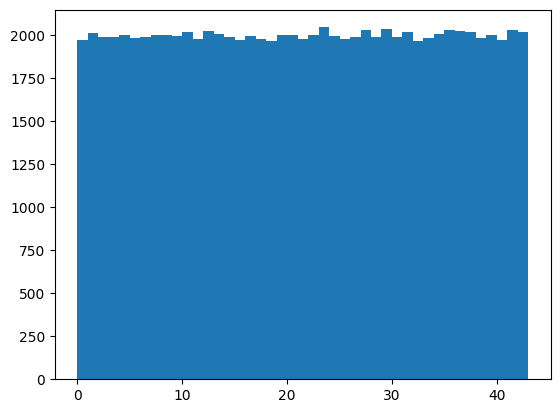

In [17]:
plt.hist(y_train,np.arange(0,44))

In [18]:
X_train = np.transpose(X_train, (0, 3, 1, 2))
X_test = np.transpose(X_test, (0, 3, 1, 2))

In [19]:
X_train.shape

(86000, 3, 32, 32)

In [20]:
train_dataset = TensorDataset(torch.from_numpy(X_train[:45000]).float(), torch.LongTensor(y_train[:45000]))

In [21]:
test_dataset = TensorDataset(torch.from_numpy(X_test[:5000]).float(), torch.LongTensor(y_test[:5000]))

In [22]:
batch_size = 60

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=90, shuffle=False)

In [6]:
n_epochs = 10
learning_rate = 0.001

loss_fn = torch.nn.CrossEntropyLoss()

# Рассмотрим модель с большим числом сверток

# Есть проблема с графиками loss и accuracy. Они на каждой эпохе получаются очень хорошими, даже для откровенно плохих моделей. Это должно быть связано с методом подсчета метрик, но я не могу найти ошибку.

In [310]:
n_epochs = 4

model_big = Model_Big()
model_big = model_big.apply(init_weights)

In [311]:
acc_train_big, loss_train_all_big, acc_test_all_big, loss_test_all_big = model_big.fit(n_epochs, learning_rate, train_loader, test_loader)

Epoch 0: 
 Accuracy - train: 0.9734888888888911 | test: 0.9694841269841262 
 Loss - train: 0.10129319131374359 | test: 0.1129886731505394
Epoch 1: 
 Accuracy - train: 0.9875333333333369 | test: 0.9824206349206345 
 Loss - train: 0.05084238573908806 | test: 0.07946272194385529
Epoch 2: 
 Accuracy - train: 0.9815555555555587 | test: 0.9788492063492059 
 Loss - train: 0.06460808962583542 | test: 0.07387131452560425
Epoch 3: 
 Accuracy - train: 0.9925555555555575 | test: 0.9880952380952371 
 Loss - train: 0.026712710037827492 | test: 0.04162951931357384


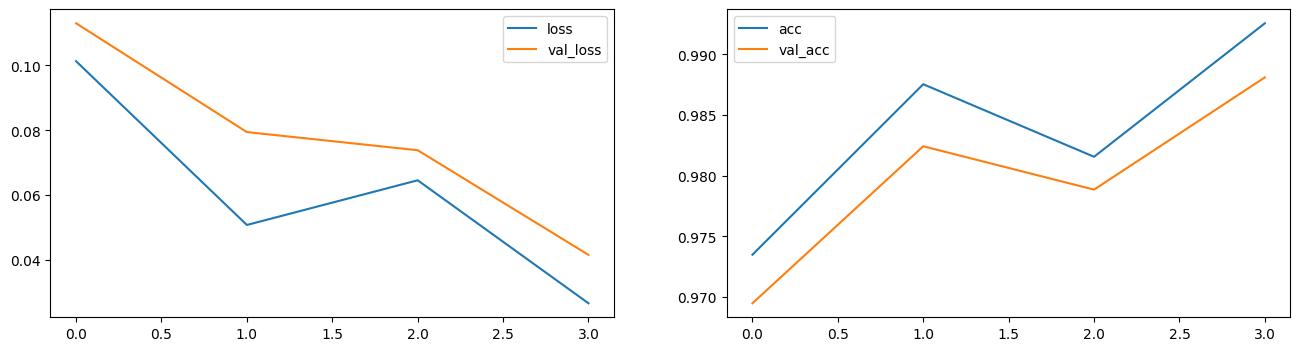

In [312]:
vis_history(acc_train_big, loss_train_all_big, acc_test_all_big, loss_test_all_big)

# Считаем метрики на всех тестовых данных

In [314]:
X_test_torch = torch.from_numpy(X_test).float()
pred_b = [np.argmax(np.abs(model_big((X_test_torch)[i]).detach().numpy())) for i in range(len(X_test_torch))]

In [315]:
print(classification_report(y_test,pred_b))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       525
         1.0       0.97      0.95      0.96       484
         2.0       0.94      0.96      0.95       509
         3.0       0.99      0.94      0.97       512
         4.0       0.97      0.99      0.98       498
         5.0       0.98      0.85      0.91       514
         6.0       0.98      0.92      0.95       508
         7.0       0.96      0.95      0.96       495
         8.0       0.98      0.99      0.98       495
         9.0       1.00      0.98      0.99       502
        10.0       0.99      0.99      0.99       478
        11.0       0.99      0.98      0.99       521
        12.0       0.99      0.99      0.99       477
        13.0       1.00      1.00      1.00       491
        14.0       1.00      0.99      1.00       507
        15.0       0.99      1.00      1.00       526
        16.0       0.99      1.00      0.99       503
        17.0       0.99    

In [324]:
n_epochs = 10

model_big_1 = Model_Big()
model_big_1 = model_big_1.apply(init_weights)

In [325]:
acc_train_big1, loss_train_all_big1, acc_test_all_big1, loss_test_all_big1 = model_big_1.fit(n_epochs, learning_rate, train_loader, test_loader)

Epoch 0: 
 Accuracy - train: 0.9752444444444486 | test: 0.9760317460317456 
 Loss - train: 0.09359956532716751 | test: 0.10103171318769455
Epoch 1: 
 Accuracy - train: 0.9858000000000037 | test: 0.9839285714285708 
 Loss - train: 0.0482790581882 | test: 0.061407774686813354
Epoch 2: 
 Accuracy - train: 0.9919111111111135 | test: 0.9879365079365072 
 Loss - train: 0.028838399797677994 | test: 0.04717256873846054
Epoch 3: 
 Accuracy - train: 0.9906000000000033 | test: 0.9865079365079357 
 Loss - train: 0.03626324236392975 | test: 0.0632418841123581
Epoch 4: 
 Accuracy - train: 0.9925777777777796 | test: 0.9867460317460314 
 Loss - train: 0.02457634173333645 | test: 0.04968314245343208
Epoch 5: 
 Accuracy - train: 0.9706666666666696 | test: 0.9625793650793649 
 Loss - train: 0.11735642701387405 | test: 0.16110815107822418
Epoch 6: 
 Accuracy - train: 0.9954444444444457 | test: 0.9908730158730154 
 Loss - train: 0.016203148290514946 | test: 0.0372423492372036
Epoch 7: 
 Accuracy - train: 0

In [326]:
X_test_torch = torch.from_numpy(X_test).float()
pred_b1 = [np.argmax(np.abs(model_big_1((X_test_torch)[i]).detach().numpy())) for i in range(len(X_test_torch))]

In [327]:
print(classification_report(y_test,pred_b1))

              precision    recall  f1-score   support

         0.0       0.99      0.83      0.90       525
         1.0       1.00      0.37      0.54       484
         2.0       0.97      0.79      0.87       509
         3.0       0.99      0.95      0.97       512
         4.0       0.67      0.02      0.05       498
         5.0       1.00      0.87      0.93       514
         6.0       0.57      0.99      0.73       508
         7.0       0.67      0.00      0.01       495
         8.0       0.97      0.94      0.96       495
         9.0       0.99      0.87      0.93       502
        10.0       0.99      0.95      0.97       478
        11.0       0.99      0.92      0.96       521
        12.0       1.00      0.93      0.96       477
        13.0       0.98      0.97      0.98       491
        14.0       0.99      0.93      0.96       507
        15.0       0.99      0.75      0.85       526
        16.0       0.28      0.98      0.43       503
        17.0       0.56    

In [104]:
X_train2 = np.transpose(X_train2, (0, 3, 1, 2))
X_test2 = np.transpose(X_test2, (0, 3, 1, 2))

In [105]:
train_dataset2 = TensorDataset(torch.from_numpy(X_train2).float(), torch.LongTensor(y_train2))
test_dataset2 = TensorDataset(torch.from_numpy(X_test2).float(), torch.LongTensor(y_test2))

In [106]:
batch_size = 60
train_loader2 = DataLoader(dataset=train_dataset2, batch_size=batch_size, shuffle=True)
test_loader2 = DataLoader(dataset=test_dataset2, batch_size=90, shuffle=False)

In [113]:
n_epochs = 6

model_big_3 = Model_Big()
model_big_3 = model_big_3.apply(init_weights)

In [114]:
acc_train_big3, loss_train_all_big3, acc_test_all_big3, loss_test_all_big3 = model_big_3.fit(n_epochs, learning_rate, train_loader2, test_loader2)

Epoch 0: 
 Accuracy - train: 0.9840539284054016 | test: 0.9820432357043238 
 Loss - train: 0.060884296894073486 | test: 0.06915489584207535
Epoch 1: 
 Accuracy - train: 0.9915039516504004 | test: 0.9904637377963734 
 Loss - train: 0.030697286128997803 | test: 0.03714559227228165
Epoch 2: 
 Accuracy - train: 0.9949790794979111 | test: 0.9930729893072979 
 Loss - train: 0.021230829879641533 | test: 0.02725626528263092
Epoch 3: 
 Accuracy - train: 0.9923407717340816 | test: 0.9905102278010219 
 Loss - train: 0.037035420536994934 | test: 0.05255976319313049
Epoch 4: 
 Accuracy - train: 0.9949093444909378 | test: 0.9931659693165964 
 Loss - train: 0.016407744958996773 | test: 0.025471316650509834
Epoch 5: 
 Accuracy - train: 0.9932124593212499 | test: 0.9916782891678284 
 Loss - train: 0.02460356615483761 | test: 0.0370207279920578


In [115]:
X_test_torch = torch.from_numpy(X_test).float()
pred_b3 = [np.argmax(np.abs(model_big_3((X_test_torch)[i]).detach().numpy())) for i in range(len(X_test_torch))]

In [116]:
print(classification_report(y_test,pred_b3))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       525
         1.0       1.00      0.73      0.84       484
         2.0       0.99      0.87      0.92       509
         3.0       1.00      0.60      0.75       512
         4.0       0.83      0.95      0.89       498
         5.0       1.00      0.71      0.83       514
         6.0       0.70      0.97      0.81       508
         7.0       0.47      0.84      0.60       495
         8.0       0.99      0.81      0.89       495
         9.0       0.97      0.96      0.97       502
        10.0       0.84      0.96      0.90       478
        11.0       1.00      0.66      0.80       521
        12.0       1.00      0.86      0.92       477
        13.0       0.86      0.71      0.78       491
        14.0       0.96      0.93      0.94       507
        15.0       0.69      0.16      0.26       526
        16.0       0.92      0.96      0.94       503
        17.0       0.83    